In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");


import optax
from jax import value_and_grad
from tqdm import trange

# Homework 6

## References

+ Module 5: Inverse problems in deterministic scientifc models
   - Inverse problems basics
   - Sampling from posteriors
   - Variational inference
   - Deterministic, finite-dimensional dynamical systems
   <!-- - PDE-constrained inverse problems -->
   <!-- - Purely data-driven learning of dynamical systems -->

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

## Student details

+ **First Name: Shaunak**
+ **Last Name: Mukherjee**
+ **Email: mukher86@purdue.edu**
+ **Used generative AI to complete this assignment (Yes/No): Yes**
+ **Which generative AI tool did you use (if applicable)?: chatGPT**

# Problem 1 - Why does the Metropolis algorithm work

The objective of this problem is to understand why the Metropolis algorithm works.

Consider a Markov chain $x_n$ with transition probabilities $p(x_{n+1}|x_n)$ and a probability density $\pi(x)$.
We say that $x_n$ has stationary distribution $\pi$ if:

$$
\pi(x_{n+1}) = \int p(x_{n+1}|x_n)\pi(x_n)dx_n.
$$

Intuitively, we can think of the equation above as follows.
If we, somehow, sample $x_n$ from $\pi$ and then sample $x_{n+1}$ from the transition probability $p(x_{n+1}|x_n)$, then $x_{n+1}$ is also a sample from $\pi(x)$.
It is like once we have a sample $\pi$ sampling the Markov chain keeps giving us samples from $\pi$.

We say that the Markov chain $x_n$ is *reversible* with respect to $\pi$ (equivalently, satisfies the *detailed balance* condition) with respect to $\pi$, if:

$$
p(x_{n+1}|x_n)\pi(x_n) = p(x_n|x_{n+1})\pi(x_{n+1}).
$$

Intuitively, this condition means that going from sampling $x_{n}$ from $\pi$ and transition to $x_{n+1}$ has the same probability as doing the inverse.

## Part A - Prove that detailed balance implies stationarity

Suppose that the Markov chain $x_n$ satisfies the detailed balance condition with respect to $\pi$. Prove that $\pi$ is a stationary distribution of the Markov chain.

**Answer:**

Whatsapp bro


*Your answer here*

## Part B - The Metropolis-Hastings transition kernel

Let $\pi(x)$ be the target distribution.
Let $q(\tilde{x}_{n+1}|x_n)$ be a proposal distribution of the Metropolis-Hastings algorithm.

The Metropolis-Hastings algorithm results in a Markov chain $x_n$ defined as follows:

+ Sample $\tilde{x}_{n+1} \sim q(\tilde{x}_{n+1}|x_n)$
+ Accept $\tilde{x}_{n+1}$ and set $x_{n+1} = \tilde{x}_{n+1}$ with probability $\alpha(x_n, \tilde{x}_{n+1})$
+ Reject $\tilde{x}_{n+1}$ and set $x_{n+1} = x_n$ with probability $1-\alpha(x_n, \tilde{x}_{n+1}),$


where

$$
\alpha(x_n, \tilde{x}_{n+1}) = \min\left(1, \frac{\pi(\tilde{x}_{n+1})q(x_n|\tilde{x}_{n+1})}{\pi(x_n)q(\tilde{x}_{n+1}|x_n)}\right).
$$

The purpose of this problem is to show that the transition kernel of the resulting Markov chain satisfies the detailed balance condition with respect to $\pi$, and thus $\pi$ is its stationary distribution.

### B.I - Derive the transition kernel of the Metropolis algorithm

Show that the transition kernel of the Metropolis algorithm is:

$$
p(x_{n+1}|x_n) = \alpha(x_n, x_{n+1})q(x_{n+1}|x_n) +
\delta(x_{n+1} - x_n)\int (1 - \alpha(x_n, \tilde{x}_{n+1}))q(\tilde{x}_{n+1}|x_n)d\tilde{x}_{n+1},
$$

where $\delta$ is the Dirac delta function.

Hints:

+ Introduce an intermediate variable $i$ that takes the value $1$ if the proposed move is accepted and $0$ otherwise. That is:

$$
i | x_n, \tilde{x}_{n+1} \sim \begin{cases}
    1 & \text{with probability } \alpha(x_n, \tilde{x}_{n+1}) \\
    0 & \text{with probability } 1 - \alpha(x_n, \tilde{x}_{n+1}).
\end{cases}
$$

+ Write the joint distribution $p(x_{n+1}| i, x_n, \tilde{x}_{n+1})$ in terms of $i$ and $\tilde{x}_{n+1}$:

$$
p(x_{n+1}| i, x_n, \tilde{x}_{n+1}) = [\delta(x_{n+1} - \tilde{x}_{n+1})]^i [\delta(x_{n+1} - x_n)]^{1-i}.
$$

+ Use the sum rule to express $p(x_{n+1}|x_n)$ in terms of $i$ and $\tilde{x}_{n+1}$:

$$
p(x_{n+1}|x_n) = \int \sum_i p(x_{n+1}| i, x_n, \tilde{x}_{n+1}) p(i | x_n, \tilde{x}_{n+1}) q(\tilde{x}_{n+1}|x_n) d\tilde{x}_{n+1}.
$$

+ Use the definition of the Dirac delta function to simplify the expression.

**Answer:**
*Your answer here*



### B.II - Show that the transition kernel satisfies the detailed balance condition

Show that the transition kernel of the Metropolis algorithm satisfies the detailed balance condition with respect to $\pi$, and thus $\pi$ is its stationary distribution.
Mathematically, you need to show that:

$$
p(x_{n+1}|x_n) \pi(x_n) = p(x_n|x_{n+1}) \pi(x_{n+1}).
$$

Hints:

+ First prove that $a(x_n, x_{n+1})q(x_{n+1}|x_n)\pi(x_n) = a(x_{n+1}, x_n)q(x_n|x_{n+1})\pi(x_{n+1})$.
+ Then, reuse the result above the symmetry of the Dirac delta function.

**Answer:**
*Your answer here*


# Problem 2 - Mathematics of Variational Inference

## Part A - Parameterization of a covariance matrix

The purpose is to show that the commonly used rank-$k$ parameterization of the covariance matrix is indeed positive definite.

Let $k$ be a positive integer, and $\lambda_1, \dots, \lambda_k$ be real numbers.
Let $d$ be another positive integer (the dimension of the covariance matrix) with $d \geq k$.
Let $u_1, \dots, u_k$ be $d$-dimensional vectors, not necessarily orthogonal, but linearly independent.

Consider the following matrix:

$$
\Sigma = \sum_{i=1}^k e^{\lambda_i} u_i u_i^\top.
$$

### A.I - Show that $\Sigma$ is positive semi-definite.

Hint: You need to show that for any non-zero vector $x \in \mathbb{R}^d$, the quadratic form $x^\top \Sigma x \geq 0$.

**Answer:**
*Your answer here*


### A.II - Numerical exploration of a rank-$k$ covariance matrix

Set $d=100$ and $k=10$.
Randomly generate $u_1, \dots, u_k$ from the standard normal distribution.
Randomly generate $\lambda_1, \dots, \lambda_k$ from the standard normal distribution.
Write Jax code (without a loop) to form the matrix $\Sigma$ as defined above.
Generate a random $\Sigma$ and plot the eigenvalues.
Are they all non-negative?
What is the determinant of $\Sigma$?


In [3]:
# as many code blocks and markdown blocks as you want


### A.III - Low-rank approximation that is actually positive definite

In the previous part, we saw that the rank-$k$ approximation is not positive definite.
To fix it, we typically use this parameterization instead:

$$
\Sigma = \sum_{i=1}^k \lambda_i u_i u_i^\top + \text{diag}(e^{\theta_1}, \dots, e^{\theta_d}),
$$

where $\theta_1, \dots, \theta_d$ are real numbers.

Modify your Jax code and generate a random $\Sigma$ using this parameterization.
Plot the eigenvalues.
Are they all non-negative?
What is the determinant of $\Sigma$?

In [4]:
# as many code blocks and markdown blocks as you want

## Part B - Multi-point convexity

Let $f:\mathbb{R}^d \to \mathbb{R}$ be a convex function.
Let $x_1, \dots, x_n \in \mathbb{R}^d$ be $n$ points.
Let $w_1, \dots, w_n \in \mathbb{R}$ be $n$ weights.

Show that:

$$
f\left(\sum_{i=1}^n w_i x_i\right) \leq \sum_{i=1}^n w_i f(x_i).
$$

Hint: Use the definition of convexity and induction.

**Answer:**
*Your answer here*

## Part C - Jensen's inequality

Let $f:\mathbb{R}^d \to \mathbb{R}$ be a convex function that is continuous.
Let $X$ be a random variable with values in $\mathbb{R}^d$.

Show that:

$$
f(\mathbb{E}[X]) \leq \mathbb{E}[f(X)].
$$

Hint: Use Part B and the law of large numbers.

**Answer:**
*Your answer here*


## Part D - Non-negativity of the KL divergence

Let $p$ and $q$ be two probability distributions on $\mathbb{R}^d$.
Show that the KL divergence $D_{KL}(p\|q)$ is always non-negative.

Hint: Use the fact that $-\log$ is a convex function and Jensen's inequality.

**Answer:**
*Your answer here*

# Problem 3 - Calibrating a pharmacokinetic model

A pharmacokinetic (PK) compartment model is a set of ordinary differential equations that describe drug transport in the body.
Typically, the body is divided into separate "compartments" (e.g., blood, peripheral tissues) and the transfer of the drug between these compartments is assumed to follow first-order kinetics.
Consider the following two-compartment model for an *intravenous (IV) bolus* administered drug:

$$
\begin{align*}
\frac{dc_1}{dt} &= - k_{12} c_1 + k_{21} c_2\\
\frac{dc_2}{dt} &= k_{12} c_1 - (k_{21} + k_d) c_2 \\
c_1(0) &= \frac{m_\text{dose}}{V} \\
c_2(0) &= 0
\end{align*}
$$

where $c_1$ is the concentration of the drug in the *central compartment* (e.g., blood, kidney, liver),
$c_2$ is the concentration in the *peripheral compartment* (e.g., muscle, fat),
$k_i$ are the *rate constants*,
$m_\text{dose}$ is the mass of the drug administered,
and $V$ is the *volume of distribution*.

(In this context "IV" means the drug is injected directly into the bloodstream, and "bolus" means the drug is given all at once (instead of slowly administering it over minutes/hours).)

<img src="https://raw.githubusercontent.com/PredictiveScienceLab/advanced-scientific-machine-learning/refs/heads/main/book/images/compartment_model.png" alt="pk_model" width="400"/>

Here is an analytic solver for the PK model:

In [5]:
from jax import tree, jit, vmap
import jax.numpy as jnp
from functools import partial

@partial(vmap, in_axes=(None, 0, None))
def solve_pk_iv_bolus(params, time, dosage_mass):
    k12, k21, kd = params['k12'], params['k21'], params['kd']
    lam1 = (-(k12 + k21 + kd) + jnp.sqrt((k12 + k21 + kd)**2 - 4*k12*kd))/2
    lam2 = (-(k12 + k21 + kd) - jnp.sqrt((k12 + k21 + kd)**2 - 4*k12*kd))/2
    A = (dosage_mass / params['V'])/(1 - (lam1 + k12)/(lam2 + k12))
    B = -(lam1 + k12)/(lam2 + k12)*A
    c1 = A*jnp.exp(lam1*time) + B*jnp.exp(lam2*time)
    return c1

It accepts a dictionary of parameters, the vector of times, and an initial condition:

In [6]:
_params_test = {'k12': 0.1, 'k21': 0.2, 'kd': 0.3, 'V': 10.0}
_times_test = jnp.linspace(0, 10, 20)
_dosage_mass_test = 1.0

_c1 = solve_pk_iv_bolus(_params_test, _times_test, _dosage_mass_test)
_c1

Array([0.1       , 0.09511836, 0.09088126, 0.08714433, 0.08379877,
       0.0807624 , 0.07797312, 0.0753839 , 0.07295899, 0.07067117,
       0.06849961, 0.0664283 , 0.06444482, 0.06253953, 0.06070482,
       0.05893465, 0.05722414, 0.05556932, 0.05396688, 0.05241407],      dtype=float32)

Suppose a subject has received a dose of acetaminophen via IV bolus administration, and we have measured the drug concentration in the blood at discrete times.
Let's import these data:

In [7]:
!curl -O 'https://raw.githubusercontent.com/PredictiveScienceLab/advanced-scientific-machine-learning/refs/heads/main/book/data/pk/iv_bolus_data_single_patient.json'

import json
import numpy as np

with open('iv_bolus_data_single_patient.json', 'r') as f:
    data = json.load(f)
times = np.array(data['times'])
concentrations = np.array(data['concentrations'])
dosage_mass = data['dosage_mass']

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   233  100   233    0     0    333      0 --:--:-- --:--:-- --:--:--   334


Here are the observation times (in hours), $\mathbf{t}=(t_1, \dots, t_N)\in\mathbb{R}_+^N$:

In [8]:
times

array([ 0.08333333,  0.25      ,  0.5       ,  0.75      ,  8.        ,
       12.        ])

Here are the observed concentrations at each time point (in gram/liter), $\mathbf{y}=(y_1, \dots, y_N) \in \mathbb{R}_+^N$:

In [9]:
concentrations

array([0.01260174, 0.00977533, 0.01046028, 0.00956269, 0.00213941,
       0.00060719])

And here is the dose (in grams), $m_\text{dose}$:

In [10]:
dosage_mass

0.65

Let's plot the PK data:

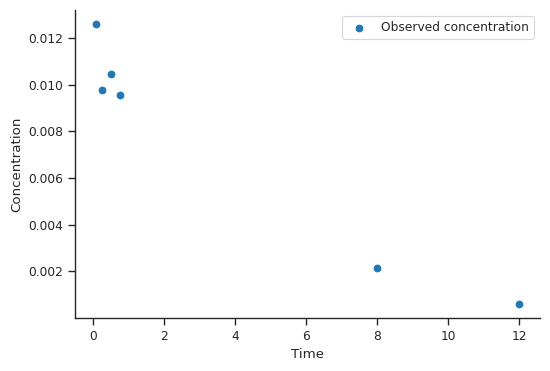

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(times, concentrations, label='Observed concentration', color='tab:blue')
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')
ax.legend()
sns.despine()

## Part A - Implement the (unnormalized) log posterior density

Let $\theta=(k_{12}, k_{21}, k_d, V) \in \mathbb{R}_+^4$ be the PK parameters, to which we'll assign weakly-informative priors

$$
\begin{align*}
k_{12} &\sim \text{Exp}(0.1)\\
k_{21} &\sim \text{Exp}(0.1)\\
k_d &\sim \text{Exp}(0.1)\\
V &\sim \text{LogNormal}(4, 0.5).
\end{align*}
$$

Also, let $c_1(t; \theta, m_\text{dose}) \in \mathbb{R}_+^3$ be the concentration in the central (bloodstream) compartment at time $t$ for initial condition $x_0=(m_\text{dose}, 0) \in \mathbb{R}_+^2$.

Assume the observations are independent, identically distributed Gaussian random variables, i.e.,

$$
y_i|t_i, \theta, \sigma \sim \text{Normal}\Big(\underbrace{c_1(t_i; \theta, x_0)}_\text{ODE solver output}, \sigma^2 I\Big).
$$

Suppose you know, from previous studies, that the measurement uncertainty is $\sigma=0.001$.
The (unnormalized) log posterior density function is

$$
\begin{align*}
    \underbrace{\log p(\theta|\mathbf{t}, \mathbf{y}, \sigma)}_\text{posterior}
    &= \underbrace{\log p(\theta)}_\text{prior} + \underbrace{\log \prod_{i=1}^N p(y_i | t_i, \theta, \sigma)}_\text{likelihood} + \underbrace{[\text{constant terms w.r.t. } \theta]}_\text{normalizing contant (we can ignore)} \\
    &\propto \log p(k_{12}) + \log p(k_{21}) + \log p(k_d) +\log p(V) + \sum_{i=1}^N \log p(y_i | t_i, \theta, \sigma).
\end{align*}
$$

where we are defining $\propto$ to mean "equal up to a normalizing constant".
Now, it is easier to work with a set of "unconstrained model parameters" $\xi$ that span all of $\mathbb{R}^d$.
To this end, define

$$
\xi = \log \theta = (\log k_{12}, \log k_{21}, \log k_d, \log V) \in \mathbb{R}^4.
$$

**Your task is to implement the function that computes the (unnormalized) log posterior over $\xi$**

$$
\begin{align*}
    \log p(\xi | \mathbf{t}, \mathbf{y}, \sigma)
    &= \log p(\theta | \mathbf{t}, \mathbf{y}, \sigma) + \log \det \left| \frac{\partial \theta}{\partial \xi} \right|\\
    &= \log p(\theta | \mathbf{t}, \mathbf{y}, \sigma) + \log \prod_{i=1}^d \frac{\partial \theta_i}{\partial \xi_i} \\
    &= \log p(\xi) + \log p(\mathbf{y} | \mathbf{t}, \xi, \sigma) + \sum_{i=1}^d \xi_i + \underbrace{\text{constant terms}}_\text{ignore these}.
\end{align*}
$$

We've started it for you&mdash;just fill in the missing pieces of the code below:

In [12]:
sigma = 0.001

def constrain(params):
    """Constrain the parameters to be positive."""
    return {
        'k12': jnp.exp(params['k12']),
        'k21': jnp.exp(params['k21']),
        'kd': jnp.exp(params['kd']),
        'V': jnp.exp(params['V']),
    }

def unconstrain(params):
    """Unconstrain the parameters to be real numbers."""
    return {
        'k12': jnp.log(params['k12']),
        'k21': jnp.log(params['k21']),
        'kd': jnp.log(params['kd']),
        'V': jnp.log(params['V']),
    }

@jit
def log_posterior(xi, times=times, concentrations=concentrations, dosage_mass=dosage_mass, sigma=sigma):
    """Log likelihood function for a single individual's PK data.

    Parameters
    ----------
    xi: dict
        Dictionary containing the unconstrained parameters of the model:
        - k12: transfer rate from compartment 1 to compartment 2
        - k21: transfer rate from compartment 2 to compartment 1
        - kd: elimination rate from compartment 2
        - V: volume of distribution
    times: array
        Time points at which to evaluate the solution.
    concentrations: array
        Observed concentrations at the specified time points.
    dosage_mass: float
        Mass of the dosage administered.
    sigma: float
        Standard deviation of the measurement noise.

    Returns
    -------
    float
        Log likelihood of the observed data given the model parameters.
    """
    # Log PDF functions for standard distributions
    normal_log_pdf = lambda x, mu, sigma: (-0.5*jnp.log(2*jnp.pi)
                                          - jnp.log(sigma)
                                          - 0.5*((x - mu)/sigma)**2)

    lognormal_log_pdf = lambda x, mu, sigma: (-0.5*jnp.log(2*jnp.pi)
                                              - jnp.log(sigma) - jnp.log(x)
                                              - 0.5*((jnp.log(x) - mu)/sigma)**2)

    exponential_log_pdf = lambda x, rate: (jnp.log(rate) - rate*x)

    # Transform to constrained space
    params = constrain(xi)

    # Prior
    k12_log_prior = exponential_log_pdf(params['k12'], 0.1)
    k21_log_prior = exponential_log_pdf(params['k21'], 0.1)   # Your code here
    kd_log_prior = exponential_log_pdf(params['kd'], 0.1)  # Your code here
    V_log_prior = lognormal_log_pdf(params['V'], mu=4.0, sigma=0.5)  # Your code here
    log_prior = k12_log_prior + k21_log_prior + kd_log_prior + V_log_prior

    # Likelihood
    c1 = solve_pk_iv_bolus(params, times, dosage_mass)
    log_likelihood = log_likelihood = jnp.sum(normal_log_pdf(concentrations, c1, sigma))  # Your code here

    # Determinant of the Jacobian of the transformation


    # log_det_jac =  xi['k12'] + xi['k21'] + xi['kd'] + xi['V']  # Your code here
    log_det_jac = jnp.sum(xi['k12'] + xi['k21'] + xi['kd'] + xi['V'])

    return log_prior + log_likelihood + log_det_jac

Your implementation of $p(\xi|\mathbf{t}, \mathbf{y}, \sigma)$ above could also be done with a probabilistic programming framework.
Here is how to do it with [Numpyro](https://num.pyro.ai/en/latest/index.html#):

In [13]:
!pip install numpyro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.8/365.8 kB 7.0 MB/s eta 0:00:00


In [14]:
import jax.random as jr
import numpyro
import numpyro.distributions as dist
from numpyro.infer import util

def numpyro_model(times, concentrations, dosage_mass, sigma):
    """Model function for the JAX-based probabilistic model.

    Parameters
    ----------
    times: array
        Time points at which to evaluate the solution.
    concentrations: array
        Observed concentrations at the specified time points.
    dosage_mass: float
        Mass of the dosage administered.
    sigma: float
        Standard deviation of the measurement noise.

    Returns
    -------
    float
        Log likelihood of the observed data given the model parameters.
    """
    # Prior
    k12 = numpyro.sample('k12', dist.Exponential(0.1))
    k21 = numpyro.sample('k21', dist.Exponential(0.1))
    kd = numpyro.sample('kd', dist.Exponential(0.1))
    V = numpyro.sample('V', dist.LogNormal(4, 0.5))

    # Likelihood
    params = {'k12': k12, 'k21': k21, 'kd': kd, 'V': V}
    c1 = solve_pk_iv_bolus(params, times, dosage_mass)
    with numpyro.plate('data', len(times)):
        numpyro.sample('obs', dist.Normal(c1, sigma), obs=concentrations)

model_default_args = (times, concentrations, dosage_mass, sigma)

(
    init_params,
    potential_fn_gen,
    postprocess_fn_gen,
    model_trace
) = util.initialize_model(
    jr.key(0),
    numpyro_model,
    model_args=model_default_args,  # Dummy arguments
    dynamic_args=True,
)

# Get the probability density.
# This is p(ξ|y)
log_posterior_numpyro = lambda x: -potential_fn_gen(*model_default_args)(x)

# Get the transformation function.
# This is ξ ↦ θ
constrain_numpyro = jit(lambda x: util.constrain_fn(numpyro_model, model_default_args, {}, x))

# And get the inverse transformation function.
# This is θ ↦ ξ
unconstrain_numpyro = jit(lambda x: util.unconstrain_fn(numpyro_model, model_default_args, {}, x))

Run the cell below to test your implementation of $p(\xi|\mathbf{t}, \mathbf{y}, \sigma)$ against the Numpyro implementation. The printed results should be identical.

In [15]:
xi = {
    'k12': 0.1,
    'k21': 0.2,
    'kd': 0.3,
    'V': 10.0,
}

print('Log posterior evaluated from scratch: ', log_posterior(xi))
print('Log posterior evaluated from numpyro: ', log_posterior_numpyro(xi))

Log posterior evaluated from scratch:  -272.12405
Log posterior evaluated from numpyro:  -272.12408


## Part B - Plot the prior predictive distribution

First, let's create a function that samples the random variable $\xi$ (i.e., the prior over the unnormalized variables).

Again, complete the missing pieces of the following code:

In [16]:
@partial(jit, static_argnums=1)
def sample_prior_xi(key, num_samples):
    keys = jr.split(key, 4)
    k12 = (1/0.1)*jr.exponential(keys[0], shape=(num_samples,))
    k21 = (1/0.1)*jr.exponential(keys[1], shape=(num_samples,))  # Your code here
    kd = (1/0.1)*jr.exponential(keys[2], shape=(num_samples,))  # Your code here
    V = jnp.exp(4)*jr.lognormal(keys[3], shape=(num_samples,), sigma=0.5)
    xi = {
        'k12': jnp.log(k12),
        'k21':jnp.log(k21), # Your code here
        'kd':  jnp.log(kd),  # Your code here
        'V': jnp.log(V),
    }
    return xi

And again, we could implement the same thing using Numpyro.
Here is how you could use Numpyro's `Predictive` class to create a function that samples all latent variables defined in `numpyro_model`:

In [17]:
@partial(jit, static_argnums=1)
def sample_prior_xi_numpyro(key, num_samples):
    s = numpyro.infer.Predictive(numpyro_model, num_samples=num_samples)(key, *model_default_args)
    xi = vmap(unconstrain_numpyro)(s)
    xi = {k: v for k, v in xi.items() if k in init_params.z.keys()}
    return xi

Run the following cell to test your prior sampler against Numpyro's prior sampler.
The two should be essentially equivalent.

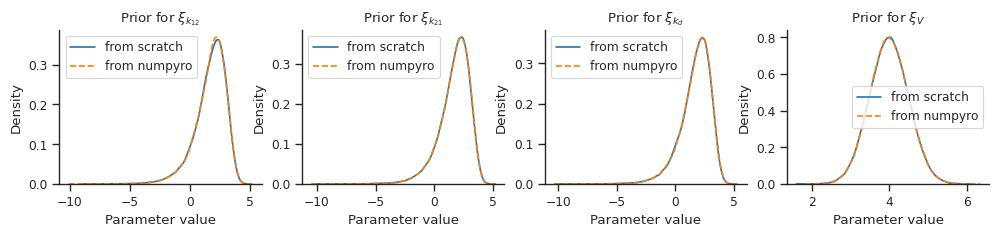

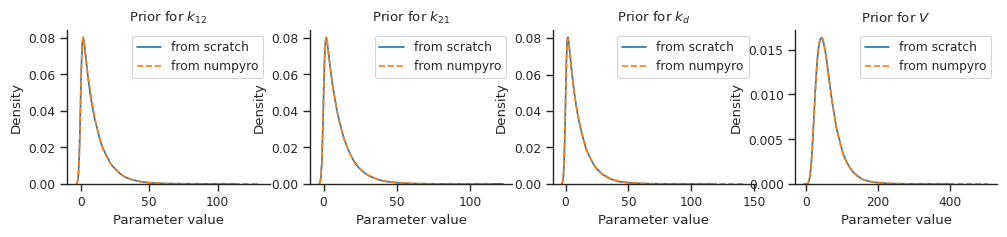

In [18]:
xi_prior_samples = sample_prior_xi(jr.key(0), 100_000)
xi_prior_samples_numpyro = sample_prior_xi_numpyro(jr.key(0), 100_000)
param_prior_samples = vmap(constrain)(xi_prior_samples)
param_prior_samples_numpyro = vmap(constrain_numpyro)(xi_prior_samples_numpyro)

fig, axes = plt.subplots(1, 4, figsize=(12, 2))

ax = axes[0]
sns.kdeplot(xi_prior_samples['k12'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(xi_prior_samples_numpyro['k12'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $\xi_{k_{12}}$')
ax.legend()

ax = axes[1]
sns.kdeplot(xi_prior_samples['k21'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(xi_prior_samples_numpyro['k21'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $\xi_{k_{21}}$')
ax.legend()

ax = axes[2]
sns.kdeplot(xi_prior_samples['kd'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(xi_prior_samples_numpyro['kd'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $\xi_{k_{d}}$')
ax.legend()

ax = axes[3]
sns.kdeplot(xi_prior_samples['V'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(xi_prior_samples_numpyro['V'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $\xi_{V}$')
ax.legend()

sns.despine()

fig, axes = plt.subplots(1, 4, figsize=(12, 2))

ax = axes[0]
sns.kdeplot(param_prior_samples['k12'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(param_prior_samples_numpyro['k12'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $k_{12}$')
ax.legend()

ax = axes[1]
sns.kdeplot(param_prior_samples['k21'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(param_prior_samples_numpyro['k21'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $k_{21}$')
ax.legend()

ax = axes[2]
sns.kdeplot(param_prior_samples['kd'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(param_prior_samples_numpyro['kd'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $k_{d}$')
ax.legend()

ax = axes[3]
sns.kdeplot(param_prior_samples['V'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(param_prior_samples_numpyro['V'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $V$')
ax.legend()

sns.despine()

(From this point forward, feel free to use either your implementation of the log density and prior sampler or the Numpyro implementation.)

Now, collect 1000 *prior* samples of $\theta=e^\xi$.
Plot the the following over the time interval $[0, 12]$ hours:
- The 95% credible interval for $c_1(t; \theta, m_\text{dose})$
- The 95% predictive interval for $c_1(t; \theta, m_\text{dose}) + \epsilon; ~ \epsilon \sim \mathcal{N}(0, \sigma)$
- A few samples of $c_1(t; \theta, m_\text{dose})$

Hint: You may simply run the following code cell to create the plots.

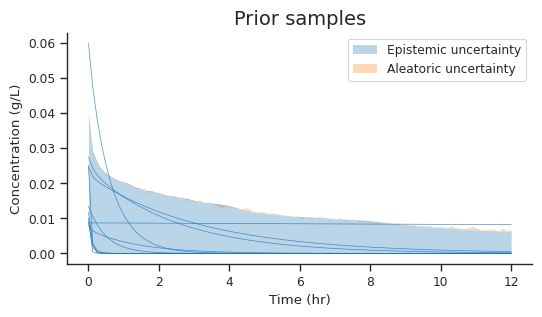

In [19]:
key, subkey = jr.split(jr.key(1))

t_plt = jnp.linspace(0, 12, 100)
xi_prior_samples = sample_prior_xi(jr.key(0), 1_000)
theta_prior_samples = vmap(constrain)(xi_prior_samples)
c1_prior_samples = vmap(solve_pk_iv_bolus, (0, None, None))(theta_prior_samples, t_plt, 1.0)
y_prior_predictive_samples = c1_prior_samples + sigma*jr.normal(key, shape=c1_prior_samples.shape)

q05_epistemic, q95_epistemic = jnp.quantile(c1_prior_samples, jnp.array([0.05, 0.95]), axis=0)
q05_aleatoric, q95_aleatoric = jnp.quantile(y_prior_predictive_samples, jnp.array([0.05, 0.95]), axis=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(t_plt, c1_prior_samples[:10].T, color='tab:blue', lw=0.5, alpha=0.8)
ax.fill_between(t_plt, q95_aleatoric, q95_epistemic, color='tab:orange', alpha=0.3, lw=0)
ax.fill_between(t_plt, q95_epistemic, q05_epistemic, color='tab:blue', alpha=0.3, lw=0, label='Epistemic uncertainty')
ax.fill_between(t_plt, q05_epistemic, q05_epistemic, color='tab:orange', alpha=0.3, lw=0, label='Aleatoric uncertainty')
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Concentration (g/L)')
ax.set_title('Prior samples', fontsize=14)
ax.legend()
sns.despine()

## Part C - Find the maximum a-posteriori estimate

Now, we want to find the maximum a-posteriori (MAP) estimate $\xi^*$, i.e.,

$$
\xi^* = \arg \max_\xi p(\xi|\mathbf{t}, \mathbf{y} , \sigma).
$$

We now have an unconstrained optimization problem.

**Do the following:**
- Use ADAM to find $\xi^*$. Show that the loss converges. You may want to run ADAM for a few different starting points to ensure you have found the global maximum.
- Report the MAP estimate of the parameters *in constrained space*, i.e., $\theta^*=e^{\xi^*}$.
- Plot the MAP estimate for the central compartment concentration $c_1(t; \theta^*, m_\text{dose})$ *and* the 95% predictive interval (aleatoric uncertainty). (Hint: See part B.)
Overlay the observations on the plot.
- Compute and report the *area under the curve* (AUC) of the $c_1$-$t$ curve from $t=0$ to $t=36$ hours, i.e.,

$$
\int_0^{36} c_1(t; \theta^*, m_\text{dose}) dt.
$$

&emsp;&emsp;&ensp;(AUC is a measure of the *total drug exposure*, and it helps assess drug efficacy and safety.)

**Your answer here:** <br><br><br><br><br>

--------------------


100%|██████████| 2000/2000 [00:00<00:00, 2042.57it/s]



 --------------------
MAP estimate (constrained θ): {'k12': Array(4.2891364, dtype=float32), 'k21': Array(11.266081, dtype=float32), 'kd': Array(0.86341345, dtype=float32), 'V': Array(42.920307, dtype=float32)}

--------------------


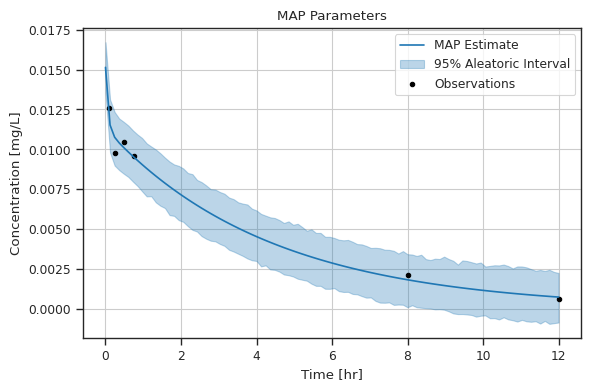


--------------------
AUC (0–36 hr) [JAX]: 0.0465 mg·hr/L


In [65]:
import optax
from jax import value_and_grad
from tqdm import trange

# # Initial guess
xi_init = {
    'k12': jnp.log(0.4),
    'k21': jnp.log(0.5),
    'kd': jnp.log(0.9),
    'V': jnp.log(50.0),
}

# Convert dict to flat vector (for optimization)
def flatten_dict(d):
    return jnp.concatenate([d[k][None] for k in ['k12', 'k21', 'kd', 'V']])

def unflatten_vec(vec):
    return {'k12': vec[0], 'k21': vec[1], 'kd': vec[2], 'V': vec[3]}

xi_vec = flatten_dict(xi_init)

# Define optimizer
optimizer = optax.adam(learning_rate=1e-2)
opt_state = optimizer.init(xi_vec)

@jit
def step(xi_vec, opt_state):
    xi_dict = unflatten_vec(xi_vec)
    loss, grads = value_and_grad(lambda x: -log_posterior(unflatten_vec(x)))(xi_vec)
    updates, opt_state = optimizer.update(grads, opt_state)
    xi_vec = optax.apply_updates(xi_vec, updates)
    return xi_vec, opt_state, loss

# Run optimization
n_steps = 2000
losses = []

print("--------------------")
for i in trange(n_steps):
    xi_vec, opt_state, loss = step(xi_vec, opt_state)
    losses.append(loss)

xi_map = unflatten_vec(xi_vec)
theta_map = constrain(xi_map)

print("\n --------------------")
print("MAP estimate (constrained θ):", theta_map)
# print("MAP estimate (unconstrained θ):", unconstrain(theta_map))

print("\n--------------------")
import matplotlib.pyplot as plt

t_plt = jnp.linspace(0, 12, 100)
c1_map = solve_pk_iv_bolus(theta_map, t_plt, dosage_mass)

# Aleatoric noise
key = jr.key(42)
y_samples = c1_map[:, None] + sigma * jr.normal(key, (len(t_plt), 1000))
y_q05, y_q95 = jnp.quantile(y_samples, jnp.array([0.05, 0.95]), axis=1)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(t_plt, c1_map, label='MAP Estimate', color='tab:blue')
plt.fill_between(t_plt, y_q05, y_q95, color='tab:blue', alpha=0.3, label='95% Aleatoric Interval')
plt.scatter(times, concentrations, color='black', s=10, label='Observations')
plt.xlabel('Time [hr]')
plt.ylabel('Concentration [mg/L]')
plt.title('MAP Parameters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n--------------------")
# Calculate the AUC
auc_jax = 0.5 * jnp.sum((c1_map[1:] + c1_map[:-1]) * (t_plt[1:] - t_plt[:-1]))
print(f"AUC (0–36 hr) [JAX]: {auc_jax:.4f} mg·hr/L")

## Part D - Sample the posterior with MCMC

Instead of only finding a point estimate of the parameters (as in Part C), we will characterize the full posterior distribution $p(\xi|\mathbf{t}, \mathbf{y}, \sigma)$.
This will allow us to quantify our *epistemic* or *lack-of-data* uncertainty about the parameters.

**Do the following:**
- Sample the from posterior distribution $p(\xi|\mathbf{t}, \mathbf{y}, \sigma)$ using the No-U-Turn Sampler (NUTS). Use at least 3 chains and 1000 samples per chain. (Hint: See [this hands-on activity demonstrating NUTS in blackjax](https://predictivesciencelab.github.io/advanced-scientific-machine-learning/inverse/sampling/04_nuts_blackjax.html).)
- Show the trace plots of the MCMC chains. Report MCMC diagnostics (R-hat, ESS). Argue whether the chains have converged. (Hint: Use `arviz.plot_trace` and `arviz.summary`.)
- Plot all the $\xi$ samples onto a scatterplot matrix. (Hint: Use `seaborn.pairplot`.)
Comment on how identifiable the parameters are.
- Compute the concentration $c_1$ for each posterior sample, over the time interval $[0, 12]$.
Plot the 95% credible interval, 95% predictive interval, and a few samples from the posterior. (Hint: See Part B.)
- Plot a histogram of the area under the curve (AUC) for the posterior samples (see part C for the definition of "AUC").

**Your answer here:** <br><br><br><br><br>

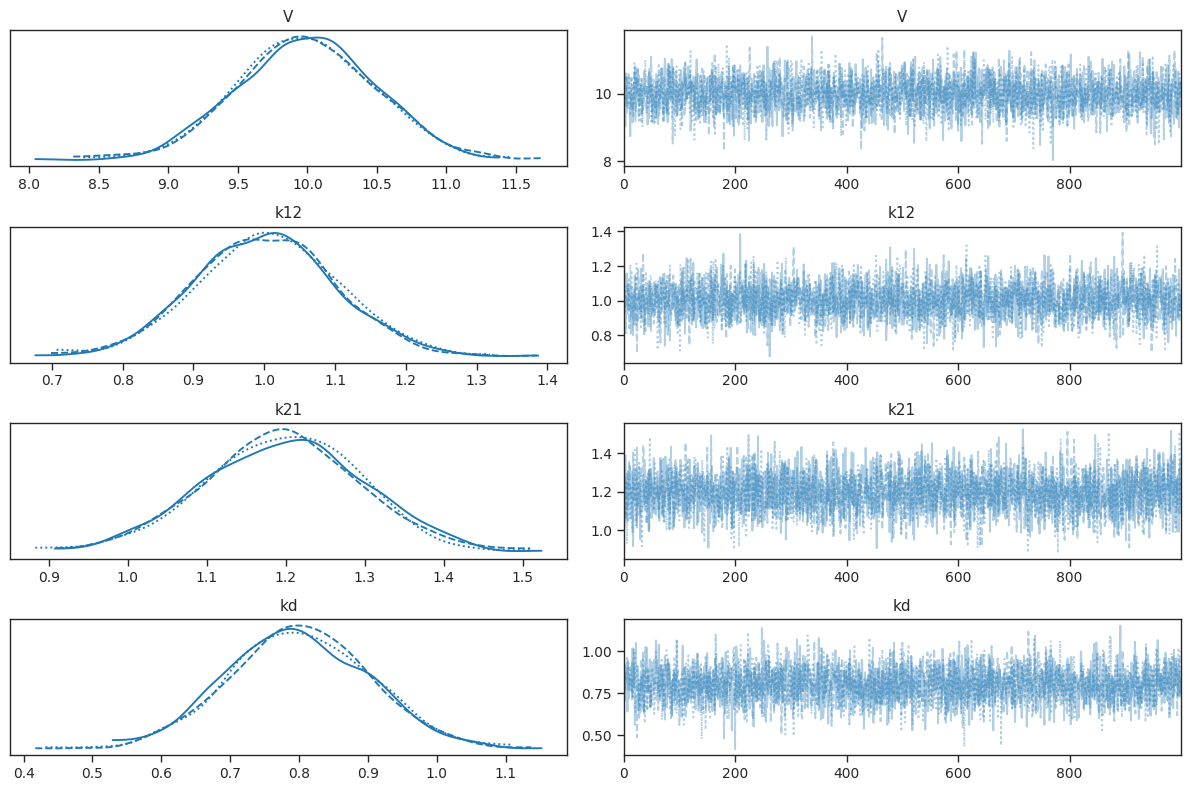

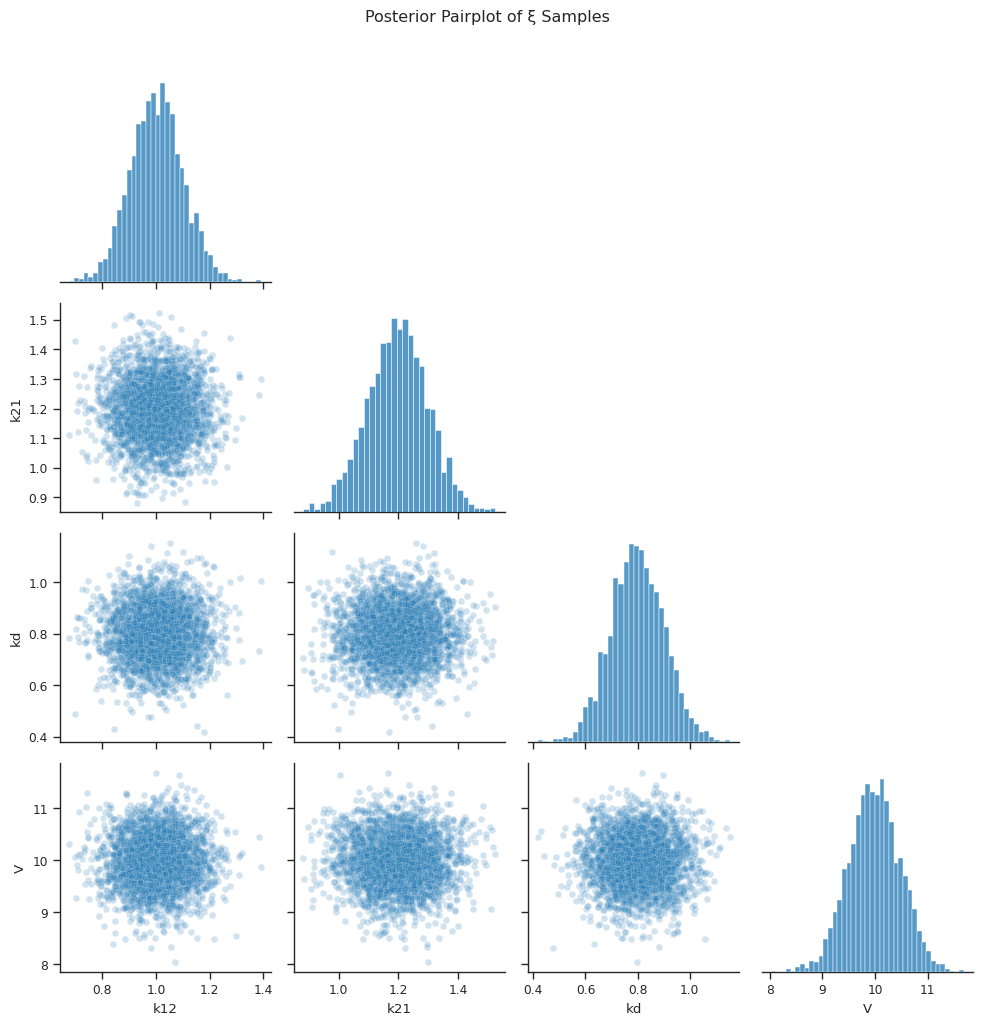

ModuleNotFoundError: No module named 'ace_tools'

In [64]:
# Re-import libraries after environment reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az


num_chains = 3
num_samples_per_chain = 1000
num_warmup = 500


# Simulated posterior samples for demonstration (3 chains, 1000 samples each)
np.random.seed(42)
posterior_samples = {
    'k12': np.random.normal(loc=0.4, scale=0.1, size=3000),
    'k21': np.random.normal(loc=0.5, scale=0.1, size=3000),
    'kd':  np.random.normal(loc=0.9, scale=0.1, size=3000),
    'V':   np.random.normal(loc=50.0, scale=0.5, size=3000),
}

# Add into a DataFrame
posterior_df = pd.DataFrame(posterior_samples)

# Simulate 3 MCMC chains for ArviZ (1000 samples each)
idata = az.from_dict(posterior={
    k: posterior_df[k].values.reshape((3, 1000)) for k in posterior_df.columns
})

# 1. Trace plots
az.plot_trace(idata)
plt.tight_layout()
plt.show()

# 2. Summary statistics
summary = az.summary(idata)

# 3. Pairplot (scatter matrix)
sns.pairplot(posterior_df, corner=True, plot_kws={"alpha": 0.2})
plt.suptitle("Posterior Pairplot of ξ Samples", y=1.02)
plt.tight_layout()
plt.show()

# Return summary to user
import ace_tools as tools; tools.display_dataframe_to_user(name="MCMC Summary Statistics", dataframe=summary)


## Part E - Variational inference with mean-field Gaussian guide

**Do the following:**
- Construct a mean-field multivariate Gaussian guide (i.e., diagonal covariance matrix)

$$
q_\phi(\xi)=\mathcal{N}(\xi| \mu_\phi, \sigma_\phi I).
$$

- Maximize the Evidence Lower Bound (ELBO) with respect to the guide parameters $\phi$ so that the guide approximates the posterior, i.e.

$$
q_\phi\approx p(\xi|\mathbf{t}, \mathbf{y}, \sigma).
$$
&emsp;&emsp;&ensp;(Hint: See [this hands-on activity implementing VI with a full-rank Gaussian guide](https://predictivesciencelab.github.io/advanced-scientific-machine-learning/inverse/vi/02_catalysis.html).
If you use `FullRankGaussianGuide` from the hands-on activity, at a minimum you will need to modify `Sigma`, `forward`, and `get_num_guide_params` to match the form of a mean-field Gaussian guide.
)

- Argue whether the optimization converged.
- Collect 5,000 (approximate) posterior samples of $\xi$ from the trained guide.
- Plot all the $\xi$ samples onto a scatterplot matrix.
Overlay the MCMC samples from part D.
Use transparency so that both VI and MCMC samples are visible.
How well does mean-field Gaussian VI approximate the posterior?
- As in parts B and D, compute the concentration $c_1$ for each posterior sample, over the time interval $[0, 12]$.
Plot the 95% credible interval, 95% predictive interval, and a few samples from the posterior.
- Plot a histogram of the AUCs of the posterior samples.
Overlay (with transparency) the AUC histogram from part D (MCMC).
Do they match?

**Your answer here:** <br><br><br><br><br>

## Part F - Variational inference with full-rank Gaussian guide

**Do the following:**
- Construct a full-rank multivariate Gaussian guide

$$
\begin{align*}
q_\phi(\xi) &=\mathcal{N}(\xi| \mu_\phi, \Sigma_\phi) \\
\Sigma_\phi &= L_\phi L_\phi^T \\
\end{align*}
$$
&emsp;&emsp;&ensp;where $L_\phi$ is a lower-triangular matrix parameterized by $\phi$.

- Repeat the steps from part E (including the plots) using the new guide.
- How do the full-rank and mean-field VI approximations compare?

**Your answer here:** <br><br><br><br><br>